In [1]:
# Colab 連結 google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [38]:
# copy google driver 檔案 到 colab content 資料夾
# copy Gdrive module 到 colab root(content)
!cp /content/drive/MyDrive/Colab/0_test.png /content
!cp /content/drive/MyDrive/Colab/T.png /content
!cp /content/drive/MyDrive/Colab/TS.jpg /content
!cp /content/drive/MyDrive/Colab/my_model.h5 /content


In [5]:
# *** copy colab contentr 檔案到 drive 資料夾
# *** 先存檔 保留戰果 去吃飯
# !cp /content/dic_id.json /content/drive/MyDrive/Colab/
!cp /content/traits_no_sqlite.csv /content/drive/MyDrive/Colab/


cp: cannot stat '/content/traits_no_sqlite.csv': No such file or directory


影像處理

In [6]:
# 顯示影像
from IPython.display import Image, display
# /0_test.png
display(Image('0_test.png'))

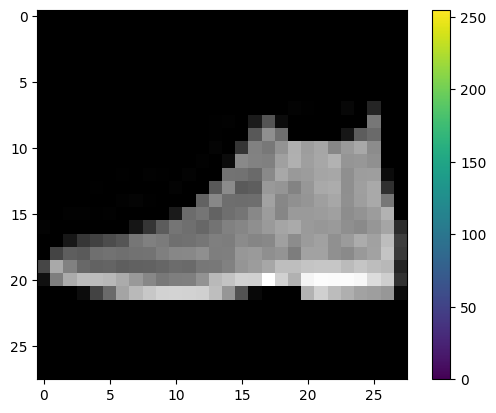

In [7]:
import matplotlib.pyplot as plt
import cv2

img = "0_test.png"
img = cv2.imread(img)
# 用 imread 圖片就會變矩陣

# reads image
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)

In [9]:
img = cv2.imread('T.png')
# 查看資料型態
type(img)

numpy.ndarray

In [10]:
img.shape

(426, 320, 3)

In [11]:
img = cv2.imread('0_test.png')
# 查看資料型態
type(img)

numpy.ndarray

In [12]:
img.shape

(28, 28, 3)

In [13]:
# 以灰階的方式讀取圖檔
img_gray = cv2.imread('T.png', cv2.IMREAD_GRAYSCALE)
img.shape

(28, 28, 3)

In [14]:
# 以灰階的方式讀取圖檔
img_gray = cv2.imread('T.png', cv2.IMREAD_GRAYSCALE)
img.shape

(28, 28, 3)

In [18]:
import cv2
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

img = cv2.imread('0_test.png')

# 顯示圖片 using cv2_imshow instead of cv2.imshow
cv2_imshow(img) # Display the image using cv2_imshow

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

In [20]:
#讀取圖片
im = Image.open("T.png")
print (im)

<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=320x426 at 0x7FC69C906D70>


In [21]:
im = im.convert('L')
print (im)

<PIL.Image.Image image mode=L size=320x426 at 0x7FC69C906E00>


# 调整图像大小为 28x28 (chatGPT)

In [24]:
from PIL import Image

# 打开图像
image = Image.open('TS.jpg')

# 调整图像大小为 28x28
resized_image = image.resize((28, 28))

# 保存调整后的图像
resized_image.save('resized_image.jpg')

# 显示调整后的图像
resized_image.show()

In [26]:
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import numpy as np

# Assuming 'resized_image' is your PIL Image
# Convert PIL Image to NumPy array
img_np = np.array(resized_image)

# Display the image using cv2_imshow
cv2_imshow(img_np)

In [27]:
#讀取圖片
im = Image.open("TS.jpg")

In [28]:
#將RGB色彩圖像, 轉為 灰度圖像 0-255 0最黑 255最白
im = im.convert('L')

In [29]:
#將圖片 調整為 28*28大小的圖像, Image.ANTIALIAS 高質量調整, 清晰度更高點 Image.NEAREST 低質量調整
# 原来是在pillow的10.0.0版本中，ANTIALIAS方法被删除了，使用新的方法即可：Image.LANCZOS
im = im.resize((28,28),Image.LANCZOS)
image_list=[]
for x in range(28) :
  scanline_list=[]
  for y in range(28):
    # 獲得這張圖片每個像速點的值
    pixel = im.getpixel((y,x))
    pixel = 255.0-pixel
    pixel = pixel/255.0
    scanline_list.append(pixel)
  image_list.append(scanline_list)

In [30]:
print (im)

<PIL.Image.Image image mode=L size=28x28 at 0x7FC6D5019AB0>


# 導入模型 prediction 預測

In [31]:
# 要定義 model (not book 'model = tf.keras.models.model_from_json')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models
from keras.models import load_model
del model

In [32]:
#轉成模型能夠接受的數據模型
# name 'np' is not defined -- import numpy as np
arr1=np.array(image_list).reshape((1,28,28,1))

In [33]:
print(arr1)

[[[[0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30980392]
   [0.30980392]
   [0.30196078]
   [0.30196078]
   [0.30196078]
   [0.30196078]
   [0.30196078]
   [0.29411765]
   [0.29411765]
   [0.29019608]
   [0.28627451]
   [0.28627451]
   [0.28235294]
   [0.28627451]
   [0.28627451]
   [0.28627451]
   [0.29019608]
   [0.29019608]
   [0.29411765]
   [0.29411765]
   [0.29411765]
   [0.29411765]]

  [[0.31764706]
   [0.32156863]
   [0.32156863]
   [0.31764706]
   [0.31372549]
   [0.31372549]
   [0.32156863]
   [0.31372549]
   [0.31372549]
   [0.31372549]
   [0.31372549]
   [0.30980392]
   [0.30980392]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30196078]
   [0.29803922]
   [0.29411765]
   [0.29019608]
   [0.29411765]
   [0.30196078]
   [0.29803922]
   [0.29803922]
   [0.29803922]
   [0.30196078]
   [0.30196078]]

  [[0.32941176]
   [0.33333333]
   [0.3254902 ]
   [0.3254902 ]
   [0.3254902 ]
   [0.3254902 ]
   [

In [34]:
# 要定義 model (not book 'model = tf.keras.models.model_from_json')
model = tf.keras.models

In [35]:
from keras.models import load_model

In [36]:
del model

In [39]:
# h5 不用 先定義 模型架構 joey
model = load_model('my_model.h5')

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
image = arr1
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
prediction = model.predict([image.reshape(-1,28*28)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


In [43]:
print (arr1)

[[[[0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30980392]
   [0.30980392]
   [0.30196078]
   [0.30196078]
   [0.30196078]
   [0.30196078]
   [0.30196078]
   [0.29411765]
   [0.29411765]
   [0.29019608]
   [0.28627451]
   [0.28627451]
   [0.28235294]
   [0.28627451]
   [0.28627451]
   [0.28627451]
   [0.29019608]
   [0.29019608]
   [0.29411765]
   [0.29411765]
   [0.29411765]
   [0.29411765]]

  [[0.31764706]
   [0.32156863]
   [0.32156863]
   [0.31764706]
   [0.31372549]
   [0.31372549]
   [0.32156863]
   [0.31372549]
   [0.31372549]
   [0.31372549]
   [0.31372549]
   [0.30980392]
   [0.30980392]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30588235]
   [0.30196078]
   [0.29803922]
   [0.29411765]
   [0.29019608]
   [0.29411765]
   [0.30196078]
   [0.29803922]
   [0.29803922]
   [0.29803922]
   [0.30196078]
   [0.30196078]]

  [[0.32941176]
   [0.33333333]
   [0.3254902 ]
   [0.3254902 ]
   [0.3254902 ]
   [0.3254902 ]
   [

In [44]:
print(prediction)

[[0.         0.         0.         0.         0.         0.
  0.         2.0749898  8.967905   0.32408142]]


In [45]:
value = prediction[0]
print (value)

[0.         0.         0.         0.         0.         0.
 0.         2.0749898  8.967905   0.32408142]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

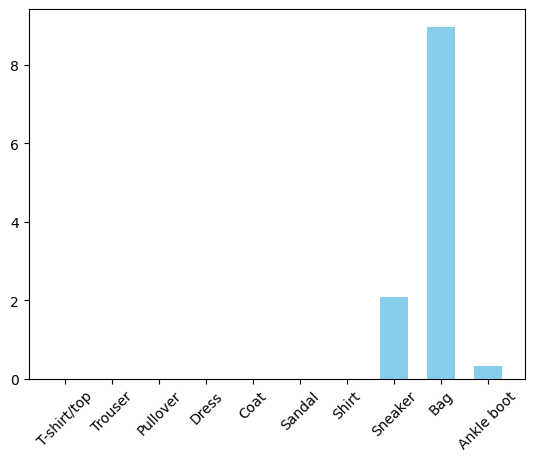

In [46]:
# 创建柱状图，设置颜色和宽度
plt.bar(classes, value, color='skyblue', width=0.6)
plt.xticks(rotation=45)

顯示 ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 為以下的可能的機率 [0.  0.  0.  0.  0.  0.  0. 2.0749898  8.967905   0.32408142]

T-shirt 猜成 Bag 顯然是錯誤了

其他練習 : 印出 圖 OR 印出array 比較會有感覺

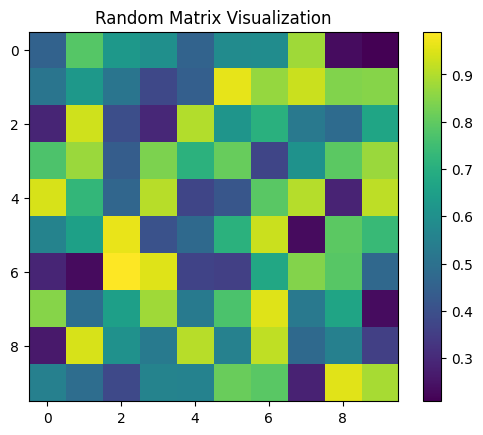

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个随机矩阵
matrix_size = (10, 10)
random_matrix = np.random.uniform(0.2, 1.0, size=matrix_size)

# 绘制图像
plt.imshow(random_matrix, cmap='viridis', interpolation='none')
plt.colorbar()  # 添加颜色条
plt.title('Random Matrix Visualization')
plt.show()

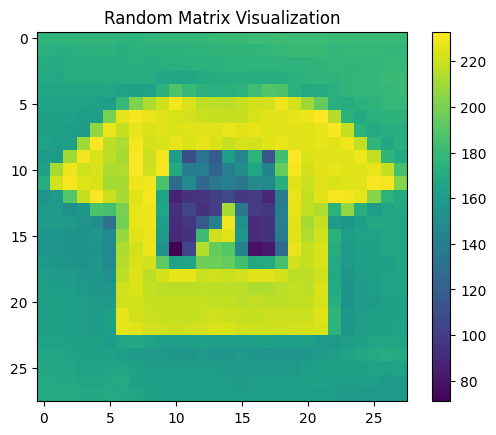

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个随机矩阵
# matrix_size = (10, 10)
# random_matrix = np.random.uniform(0.2, 1.0, size=matrix_size)

# 绘制图像
plt.imshow(im, cmap='viridis', interpolation='none')
plt.colorbar()  # 添加颜色条
plt.title('Random Matrix Visualization')
plt.show()